### GOOGLE DRIVE MOUNT




In [1]:
from google.colab import drive
drive.mount('/content/drive')




Mounted at /content/drive


In [ ]:
drive.flush_and_unmount()




```
`# This is formatted as code`
```

# # DATA LOADING AND PREPARATION


In [ ]:
%tensorflow_version 2.9.1

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


### READ DATA WITH DASK

In [ ]:
import dask.dataframe as dd
df = dd.read_csv('/content/drive/MyDrive/FINAL_PROJECT/occurrence.txt', delimiter= "\t", dtype={'acceptedNameUsageID': 'float64',
       'acceptedTaxonKey': 'float64',
       'classKey': 'float64',
       'county': 'object',
       'day': 'float64',
       'familyKey': 'float64',
       'fieldNumber': 'object',
       'genusKey': 'float64',
       'level3Gid': 'object',
       'level3Name': 'object',
       'month': 'float64',
       'orderKey': 'float64',
       'otherCatalogNumbers': 'object',
       'phylumKey': 'float64',
       'typeStatus': 'object',
       'verbatimLocality': 'object',
       'year': 'float64',
       'locationID': 'float64'                                             })

In [ ]:
df_multimedia = dd.read_csv('./drive/MyDrive/FINAL_PROJECT/multimedia.txt', delimiter= "\t")

In [ ]:
df_joined = df_multimedia[['gbifID',
 'type',
 'format',
 'identifier',
 'title',
 'description',
]].set_index('gbifID').join(df[['gbifID', 'scientificNameID',
 'acceptedNameUsageID',
 'originalNameUsageID',
 'nameAccordingToID',
 'scientificName',
 'acceptedNameUsage',
 'kingdom',
 'phylum',
 'class',
 'order',
 'family',
 'subfamily',
 'genus',
 'genericName',
 'subgenus',
 'infragenericEpithet',
 'specificEpithet',
 'infraspecificEpithet',
 'cultivarEpithet',
 'taxonRank',
 'speciesKey',
 'species',
 'dynamicProperties',
 'occurrenceID',
 'decimalLatitude',
 'decimalLongitude',
 'continent',
 'countryCode']].set_index('gbifID'))

In [ ]:
df_joined[['identifier','description','species', ]].head()

,identifier,description,species
gbifID,,,
2237851947,https://svampe.databasen.org/uploads/2019-1000...,NaN,Apioperdon pyriforme
2237851949,https://svampe.databasen.org/uploads/2018-1000...,NaN,Circinaria caesiocinerea
2237851951,https://svampe.databasen.org/uploads/2018-1000...,NaN,Polysporina simplex
2237851952,https://svampe.databasen.org/uploads/2018-1000...,NaN,Hyperphyscia adglutinata
2237851952,https://svampe.databasen.org/uploads/2018-1000...,NaN,Hyperphyscia adglutinata


In [ ]:
df_joined = df_joined.dropna(subset=['species'])

In [ ]:
counts = df_joined['species'].value_counts().compute()

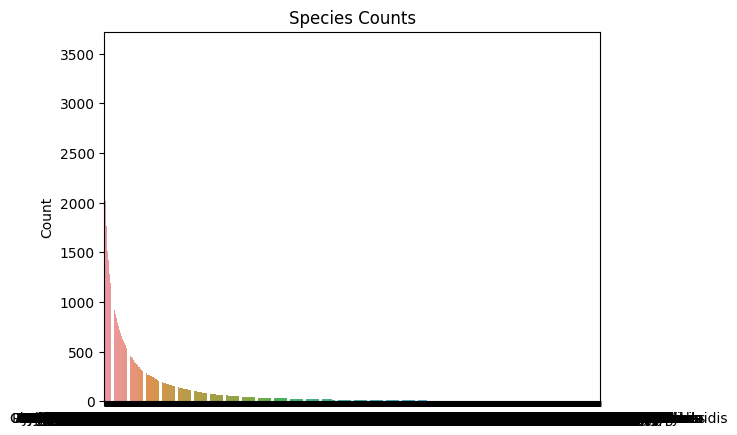

In [ ]:
sns.barplot(x=counts.index, y=counts.values)
plt.title('Species Counts')
plt.ylabel('Count')
plt.show()

In [ ]:
X_arr = []
y = []
z = []

### COLLECT IMAGE DATA

In [ ]:
import requests
import numpy as np


#select needed columns
df_img = df_joined[['species','identifier','dynamicProperties']]
#delete rows with
filtered_counts = df_joined['species'].value_counts()[df_joined['species'].value_counts() > 1000]
df_img2 = df_img[df_img['species'].isin(filtered_counts.compute().index)]
specie_names =df_img2['species'].unique().compute()
df_grouped =df_img2.groupby('species')
j = 0

for specie_name in specie_names[8:10]:
    specie_df = df_grouped.get_group(specie_name).compute().reset_index()
    #files = os.listdir(base_path+target)
    j+= 1
    os.makedirs('./drive/MyDrive/t_data/'+specie_name, exist_ok=True)
    for i in range(0,1000):
        print(specie_df.loc[i])
        try:
            res = request.urlopen(specie_df.iloc[i, 2]).read()

        except requests.exceptions.HTTPError as e:
            if e.response.status_code == 404:
                print(f"The requested URL {specie_df.iloc[i, 2]} was not found.")
            else:
                # handle other HTTP errors here
                print("HTTP error occurred:", e)
        except Exception as e:
            # handle other exceptions here
            print("Error occurred:", e)
        Sample_Image = Image.open(BytesIO(res)).resize((300,300))
        # load the image
        #img = load_img(Sample_Image)
        # convert it to an array
        img_array = np.array(Sample_Image)
        #save array in file
        f_name = specie_name+str(i)+'.npy'
        np.save('./drive/MyDrive/t_data/'+specie_name+'/'+f_name, img_array)
        # append the array to X
        X_arr.append(img_array)
        # append the numeric target to y
        y.append(specie_name)
        z.append(specie_df.iloc[i, 3])
    if j > 10:
        break


Streaming output truncated to the last 5000 lines.
gbifID                                                      2237852023
species                                              Xylaria hypoxylon
identifier           https://svampe.databasen.org/uploads/2019-1000...
dynamicProperties           {"Substrate":"dead wood (including bark)"}
Name: 0, dtype: object
gbifID                                                      2237852023
species                                              Xylaria hypoxylon
identifier           https://svampe.databasen.org/uploads/2019-1000...
dynamicProperties           {"Substrate":"dead wood (including bark)"}
Name: 1, dtype: object
gbifID                                                      2237852023
species                                              Xylaria hypoxylon
identifier           https://svampe.databasen.org/uploads/2019-1000...
dynamicProperties           {"Substrate":"dead wood (including bark)"}
Name: 2, dtype: object
gbifID                      

In [ ]:
import pickle

In [ ]:
with open('./drive/MyDrive/SPICED/y.pickle', 'wb') as f:
    pickle.dump(y, f)

In [ ]:
with open('./drive/MyDrive/SPICED/X.pickle', 'wb') as f:
    pickle.dump(X, f)

### IMPORT IMG FILES

In [3]:
import os
folder_path = "/content/drive/MyDrive/t_data"

# Get a list of the npy files in the folder
file_list = [f for f in os.listdir(folder_path) if f.endswith('.npy')]

# Sort the files
file_list = sorted(file_list)



In [ ]:
len(file_list)

9999

In [ ]:
import numpy as np
import re
y=[]
data_list = []

for i in range(0,9999):
  file_path = os.path.join(folder_path, file_list[i])
  data = np.load(file_path)
  data_list.append(data)
  name_without_number = re.sub(r'\d+', '', file_list[i].split('.')[0])
  name_without_extension = os.path.splitext(name_without_number)[0]
  y.append(name_without_extension)

In [ ]:
with h5py.File('large_array.hdf5', 'w') as f:
    dset = f.create_dataset("/content/drive/MyDrive", data=data_list)

In [ ]:
X_arr = np.array(data_list)
y_arr = np.array(y)
X_arr.shape

(9999, 300, 300, 3)

### RESIZE IMG

In [ ]:
from skimage.transform import resize
def resize_im(X_train, new_size= (256, 256)):


# Create an empty array to store the resized images
  X_train_resized = np.empty((len(X_train), *new_size, 3), dtype=np.uint8)

# Loop through each image in X_train and resize it
  for i, img in enumerate(X_train):
    X_train_resized[i] = resize(img, new_size)

  return X_train_resized


In [ ]:
X_train.shape

(6999, 300, 300, 3)

In [ ]:
X_train = resize_im(X_train, new_size= (240, 240))

### ONE HOT ENCODE Y

In [ ]:
import pandas as pd
from tensorflow.keras.utils import to_categorical
#one hot encode y

labels, levels = pd.factorize(y_arr)

# One-hot encode the integer labels
y_arr = to_categorical(labels)


### TRAIN TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_arr, y_arr, test_size=0.3, random_state=42)

# # TRANSFER LEARNING

### IMPORT PRET MODELS


In [ ]:
from tensorflow.keras.applications.efficientnet import EfficientNetB7, EfficientNetB1, preprocess_input, decode_predictions

In [ ]:
from tensorflow.keras.applications.resnet import ResNet50, preprocess_input, decode_predictions

In [ ]:
from tensorflow.keras.applications import InceptionV3

In [ ]:
en_m = EfficientNetB7(weights='imagenet', input_shape=(600,600,3), include_top=False)

In [ ]:
en_m = EfficientNetB5(weights='imagenet', input_shape=(456,456,3), include_top=False)

In [ ]:
en_m = ResNet50(weights='imagenet',input_shape=(300,300,3), include_top=False)

In [ ]:
en_m = InceptionV3(weights='imagenet',input_shape=(300,300,3), include_top=False)

In [ ]:
en_m.summary()

In [ ]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D

### FREEZE / UNFREEZE LAYERS

In [ ]:
#FREEZE LAYERS:
for layers in en_m.layers[:]:
    layers.trainable = False # -

In [ ]:
#to unfreeze some layers
unfreeze_layers = 5
for layers in en_m.layers[-unfreeze_layers:]: # --> last 5 layers trainable
    layers.trainable = True

### SHUFFLE INDICES

In [ ]:
def shuffle_indices(y_arr, X_arr):
  # Get the length of the arrays
  length = len(y_arr)

  # Shuffle the indices
  shuffled_indices = np.random.permutation(length)

  # Use the shuffled indices to shuffle both x_train and y_train
  X_arr = X_arr[shuffled_indices]
  y_arr = y_arr[shuffled_indices]
  return (y_arr, X_arr)

In [ ]:
y_arr, X_arr = shuffle_indices(y_arr, X_arr)

### TRANSFER MODEL

In [ ]:
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation


K.clear_session()
new_model_resnet = Sequential([

    # Base model
    en_m,

    # Flatten layer
    GlobalAveragePooling2D(),
    #Flatten(),

    keras.layers.Dropout(.5),
    # fc1 fully connected layer
    Dense( units=1024, activation="relu", name='fc1'),

    # fc2 fully connected layer
    Dense(units=512, activation="relu", name='fc2'),

    # fc2 fully connected layer
    Dense(units=256, activation="relu", name='fc3'),

    # output layer
    Dense(units=10, activation="softmax", name='output')

])

### MODEL SUMMARY

In [ ]:
new_model_resnet.summary()

### COMPILE MODEL

In [ ]:
new_model_resnet.compile(loss="categorical_crossentropy",
                  optimizer="Adam",
                 metrics=['accuracy'])

### DEFINING CALLBACK






In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping:
early_stop = EarlyStopping(
    monitor = 'val_loss', #the thing we are monitoring
    min_delta = 0.0005, #the minimum change in the quantity that we want for the model to train for another epoch
    patience = 3, #number of epochs with no improvement needed for the model to stop
    verbose = 1, #0 is silent, 1 means a message is displayed when something happens
    mode = "auto"

)

In [ ]:
# Garbage Collector - use it like gc.collect()
import gc
from tensorflow.keras.callbacks import Callback

# Custom Callback To Include in Callbacks List At Training Time
class GarbageCollectorCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        gc.collect()

 ### FITTING DIFFERENT *MODELS*

In [ ]:
history_resnet = new_model_resnet.fit(preprocess_input(X_train),y_train,batch_size=32, epochs=10, validation_split=0.2, callbacks= early_stop )

Epoch 1/10
175/175 [==============================] - 63s 285ms/step - loss: 6.6117 - accuracy: 0.7357 - val_loss: 0.8641 - val_accuracy: 0.8200
Epoch 2/10
175/175 [==============================] - 44s 249ms/step - loss: 0.1624 - accuracy: 0.9568 - val_loss: 0.7403 - val_accuracy: 0.8721
Epoch 3/10
175/175 [==============================] - 43s 246ms/step - loss: 0.0848 - accuracy: 0.9791 - val_loss: 0.8861 - val_accuracy: 0.8736
Epoch 4/10
175/175 [==============================] - 43s 247ms/step - loss: 0.0958 - accuracy: 0.9800 - val_loss: 1.0502 - val_accuracy: 0.8686
Epoch 5/10
175/175 [==============================] - 43s 247ms/step - loss: 0.1012 - accuracy: 0.9754 - val_loss: 1.1583 - val_accuracy: 0.8657
Epoch 5: early stopping


In [ ]:
history_resnet2 = new_model_resnet2.fit(preprocess_input(X_train),y_train,batch_size=16, epochs=10, validation_split=0.2, callbacks= early_stop )

Epoch 1/10
350/350 [==============================] - 26s 38ms/step - loss: 0.7558 - accuracy: 0.7550 - val_loss: 0.4073 - val_accuracy: 0.8729
Epoch 2/10
350/350 [==============================] - 8s 24ms/step - loss: 0.4583 - accuracy: 0.8496 - val_loss: 0.3751 - val_accuracy: 0.8743
Epoch 3/10
350/350 [==============================] - 9s 24ms/step - loss: 0.3779 - accuracy: 0.8794 - val_loss: 0.3325 - val_accuracy: 0.9014
Epoch 4/10
350/350 [==============================] - 9s 25ms/step - loss: 0.3311 - accuracy: 0.8925 - val_loss: 0.3518 - val_accuracy: 0.8900
Epoch 5/10
350/350 [==============================] - 9s 24ms/step - loss: 0.3076 - accuracy: 0.9039 - val_loss: 0.3406 - val_accuracy: 0.9043
Epoch 6/10
350/350 [==============================] - 9s 24ms/step - loss: 0.2997 - accuracy: 0.9043 - val_loss: 0.3393 - val_accuracy: 0.8864
Epoch 6: early stopping


In [ ]:
history_resnet2_unfr = new_model_resnet2.fit(preprocess_input(X_train),y_train,batch_size=32, epochs=10, validation_split=0.2, callbacks= early_stop )

Epoch 1/10
175/175 [==============================] - 19s 72ms/step - loss: 0.6694 - accuracy: 0.7876 - val_loss: 0.3966 - val_accuracy: 0.8743
Epoch 2/10
175/175 [==============================] - 8s 45ms/step - loss: 0.3075 - accuracy: 0.9018 - val_loss: 0.4021 - val_accuracy: 0.8736
Epoch 3/10
175/175 [==============================] - 8s 45ms/step - loss: 0.2379 - accuracy: 0.9214 - val_loss: 0.3783 - val_accuracy: 0.8857
Epoch 4/10
175/175 [==============================] - 8s 45ms/step - loss: 0.1976 - accuracy: 0.9350 - val_loss: 0.3837 - val_accuracy: 0.8907
Epoch 5/10
175/175 [==============================] - 8s 45ms/step - loss: 0.1479 - accuracy: 0.9518 - val_loss: 0.3766 - val_accuracy: 0.9043
Epoch 6/10
175/175 [==============================] - 8s 45ms/step - loss: 0.1463 - accuracy: 0.9520 - val_loss: 0.3933 - val_accuracy: 0.9071
Epoch 7/10
175/175 [==============================] - 8s 44ms/step - loss: 0.1109 - accuracy: 0.9629 - val_loss: 0.3657 - val_accuracy: 0.900

In [ ]:
history_inceptionv3 = new_model.fit(X_train,y_train,batch_size=16, epochs=10, validation_split=0.2, callbacks= early_stop )

Epoch 1/10
350/350 [==============================] - 16s 29ms/step - loss: 68.1496 - accuracy: 0.1970 - val_loss: 4.8052 - val_accuracy: 0.2093
Epoch 2/10
350/350 [==============================] - 7s 21ms/step - loss: 2.7746 - accuracy: 0.2704 - val_loss: 2.6014 - val_accuracy: 0.2293
Epoch 3/10
350/350 [==============================] - 7s 21ms/step - loss: 2.1041 - accuracy: 0.3454 - val_loss: 2.4499 - val_accuracy: 0.2321
Epoch 4/10
350/350 [==============================] - 7s 20ms/step - loss: 2.0667 - accuracy: 0.3363 - val_loss: 2.2572 - val_accuracy: 0.2993
Epoch 5/10
350/350 [==============================] - 7s 21ms/step - loss: 1.9494 - accuracy: 0.3701 - val_loss: 2.3135 - val_accuracy: 0.2579
Epoch 6/10
350/350 [==============================] - 7s 21ms/step - loss: 1.8429 - accuracy: 0.3806 - val_loss: 2.2623 - val_accuracy: 0.2614
Epoch 7/10
350/350 [==============================] - 7s 21ms/step - loss: 1.7285 - accuracy: 0.4072 - val_loss: 2.1414 - val_accuracy: 0.27

In [ ]:
history_inceptionv3_64 = new_model.fit(X_train,y_train,batch_size=64, epochs=10, validation_split=0.2, callbacks= early_stop )

Epoch 1/10
88/88 [==============================] - 8s 78ms/step - loss: 1.3151 - accuracy: 0.5346 - val_loss: 2.0030 - val_accuracy: 0.3486
Epoch 2/10
88/88 [==============================] - 4s 45ms/step - loss: 1.1442 - accuracy: 0.5980 - val_loss: 1.9992 - val_accuracy: 0.3479
Epoch 3/10
88/88 [==============================] - 4s 45ms/step - loss: 1.0800 - accuracy: 0.6201 - val_loss: 2.0507 - val_accuracy: 0.3421
Epoch 4/10
88/88 [==============================] - 4s 45ms/step - loss: 0.9959 - accuracy: 0.6515 - val_loss: 2.1062 - val_accuracy: 0.3579
Epoch 5/10
88/88 [==============================] - 4s 45ms/step - loss: 0.9743 - accuracy: 0.6560 - val_loss: 2.1635 - val_accuracy: 0.3700
Epoch 5: early stopping


# # RESULTS

### PLOTTING RESULTS

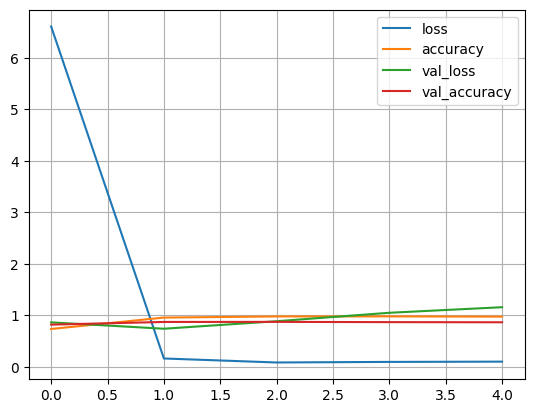

In [ ]:
from matplotlib import pyplot as plt

pd.DataFrame(history_resnet.history).plot()
plt.grid(True)

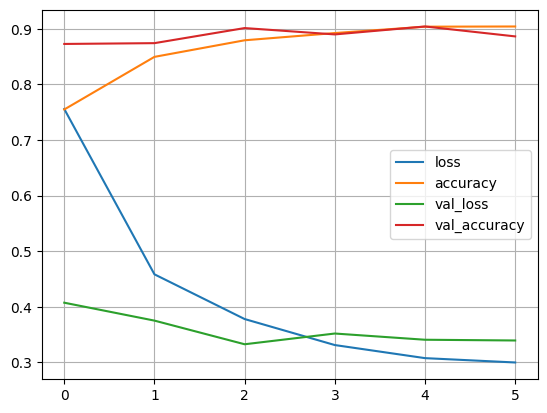

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
pd.DataFrame(history_resnet2.history).plot()

plt.grid(True)

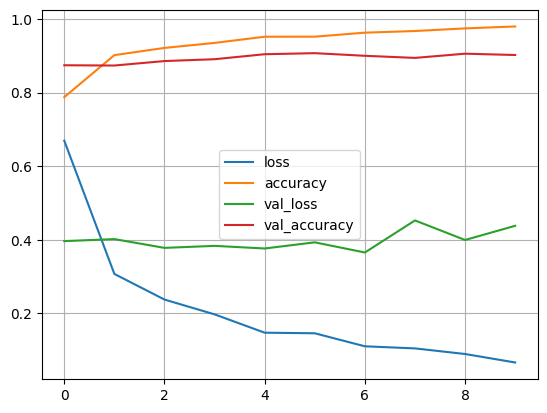

In [ ]:

pd.DataFrame(history_resnet2_unfr.history).plot()

plt.grid(True)

### CONFUSION MATRIX

In [ ]:
y_pred

array([[1.4393968e-02, 4.7270674e-03, 1.0576650e-02, ..., 3.4206737e-02,
        1.3007323e-02, 4.1186342e-01],
       [3.4951199e-02, 3.1369293e-01, 1.6847417e-02, ..., 7.6921351e-02,
        3.2365978e-02, 2.9928735e-01],
       [7.7866799e-01, 8.0398786e-05, 2.1379192e-01, ..., 3.1090298e-04,
        2.0383761e-04, 6.7702605e-04],
       ...,
       [1.5461075e-02, 8.7017827e-03, 2.9121518e-02, ..., 2.8692563e-03,
        1.8953541e-02, 2.9924566e-02],
       [4.0375517e-04, 3.6104791e-06, 9.6140357e-06, ..., 5.7787507e-05,
        1.9639190e-05, 9.7030605e-04],
       [5.9607197e-03, 4.9993005e-03, 1.0858012e-03, ..., 3.3904051e-03,
        4.4104811e-02, 9.1511613e-01]], dtype=float32)

In [ ]:
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labes = np.argmax(y_test, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_labes, y_pred_labels)
cm

array([[280,   0,   1,   4,   0,   0,   3,   3,  14,  21],
       [  3, 145,   0,   0,   7,   4,   0,   6,  92,  33],
       [ 32,   0, 218,  17,   2,   0,   1,   1,   7,  30],
       [ 32,   1,  59, 122,   1,   0,   6,   4,  19,  58],
       [  3,   9,   0,   8, 104,   7,  12,  14,  60,  67],
       [  5,   9,   2,   5,   2,  95,  15,   3,  30, 155],
       [ 10,   1,   0,   3,   5,   3, 205,   3,  17,  26],
       [ 18,  14,   0,   0,   6,   0,   2, 153,  37,  65],
       [ 24,   3,   2,   0,   3,   1,   8,   1, 265,  25],
       [  2,   1,   2,   2,   5,   0,   1,   2,  10, 244]])

### SAVE MODEL

In [ ]:
new_model_resnet2.save('/content/drive/MyDrive/my_model_resnet2_unfreeze.h5', include_optimizer=True)

In [ ]:

tensorflow.keras.models.save_model(new_model, '/content/drive/MyDrive/model.h5',
                           save_format='h5',)

In [ ]:
from tensorflow.keras.models import load_model

# load saved model
model = load_model('/content/drive/MyDrive/my_model_resnet2.h5')


### VISUAL KERAS

In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.0/992.0 KB 13.0 MB/s eta 0:00:00


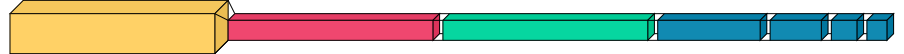

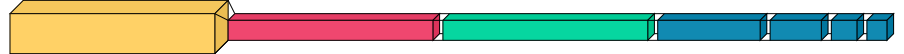

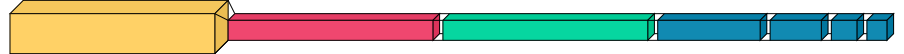

In [ ]:
import visualkeras



visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

visualkeras.layered_view(model)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 10, 10, 2048)      23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 fc1 (Dense)                 (None, 1024)              2098176   
                                                                 
 fc2 (Dense)                 (None, 512)               524800    
                                                                 
 fc3 (Dense)                 (None, 256)               131328    
                                                        